# Zipfs Law

## Load Files

In [1]:
from goodreads_shelves import get_shelves_given_titles
from preprocessor import PreProcessor
from library import Library
from tqdm import tqdm
from os.path import isfile
import pickle

TITLES = '../data/base/books.txt'
SHELVES = '../data/base/book_shelves.json'

DELIM = '../data/base/books_delimiter_data.txt'
RAW = '../data/raw'

DICT = '../data/dumps/book_dictionary.dict'
CORP = '../data/dumps/book_corpus.dict'
TOKEN = '../data/dumps/token_dump.p'

LDA_MODEL = '../data/dumps/lda_model.p'
LSI_MODEL = '../data/dumps/lsi_model.p'

# Get book texts split into chapters
preprocessor = PreProcessor(DICT, CORP, DELIM, RAW, TOKEN, 0)
dictionary, corpus, books = preprocessor.get_library_info()

## Get Term Frequencies

In [2]:
from bigram_model import BigramModel
bm = BigramModel()

for title in books:
    bm.add_document(books[title]['book_tokens'])

In [3]:
unigram_freqs = bm.unigram_term_freqs
unigram_total_freqs = bm.unigram_total_term_freqs

unigram_probs = {}

for unigram in unigram_freqs:
    unigram_probs[unigram] = unigram_freqs[unigram] / unigram_total_freqs

54142


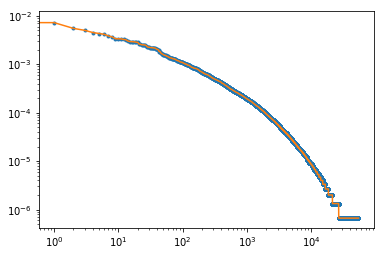

In [7]:
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt

sorted_unigram_probs = [(token, unigram_probs[token]) for token in unigram_probs]
sorted_unigram_probs = sorted(sorted_unigram_probs, key=lambda x: x[1], reverse=True)
print(len(sorted_unigram_probs))

x = []
for pair in sorted_unigram_probs:
    x.append(pair[1])
    
    
f = interp1d(range(0, len(x)), x)
plt.xscale('log')
plt.yscale('log')
plt.plot(range(0,len(x)),x,'.',range(0,len(x)),f(range(0,len(x))),'-')
plt.show()